In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers,models

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np


In [5]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 1397s 8us/step


In [6]:
 X_train.shape
    

(50000, 32, 32, 3)

In [7]:
X_test.shape


(10000, 32, 32, 3)

In [13]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
classes[9]

'truck'

In [12]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

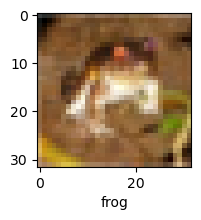

In [18]:
plot_sample(X_train,y_train,0)

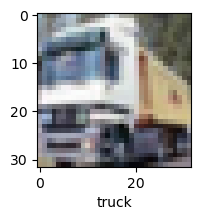

In [19]:
plot_sample(X_train,y_train,1)

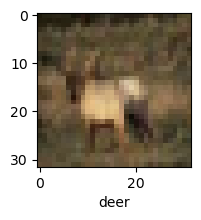

In [20]:
plot_sample(X_train,y_train,3)

In [23]:
X_train=X_train/255
X_test= X_test/255

In [25]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
    
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics =['accuracy'])

ann.fit(X_train,y_train,epochs=5)



Epoch 1/5


1563/1563 [==============================] - 73s 45ms/step - loss: 1.8130 - accuracy: 0.3527
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6211 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5392 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4786 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4287 - accuracy: 0.4958


In [26]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4903 - accuracy: 0.4724


[1.490328073501587, 0.4724000096321106]

In [27]:
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np

y_pred =ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]

print("classification Report: \n" , classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 8ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.55      0.53      1000
           1       0.76      0.33      0.46      1000
           2       0.33      0.47      0.38      1000
           3       0.38      0.29      0.33      1000
           4       0.36      0.45      0.40      1000
           5       0.39      0.39      0.39      1000
           6       0.52      0.55      0.54      1000
           7       0.60      0.51      0.55      1000
           8       0.53      0.68      0.59      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [29]:
# Now we use CNN To improve the performance of the model in detecting the images

In [30]:
cnn= models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [34]:
cnn.compile(

    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.5041 - accuracy: 0.4588
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1529 - accuracy: 0.5958
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0243 - accuracy: 0.6436
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9340 - accuracy: 0.6775
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8683 - accuracy: 0.7000
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8148 - accuracy: 0.7192
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7664 - accuracy: 0.7346
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7202 - accuracy: 0.7497
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6857 - accuracy: 0.7622
Epoch 10/10
1563/1563 [==============================] - 32s 21m

In [36]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.9572 - accuracy: 0.6900


[0.9571533203125, 0.6899999976158142]

In [37]:
y_test =y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

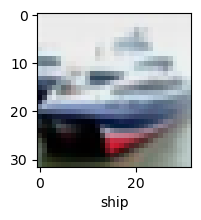

In [38]:
plot_sample(X_test,y_test,1)

In [39]:
y_pred= cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.53323897e-04, 7.26101498e-05, 7.87711397e-05, 3.11154574e-01,
        1.93728672e-04, 4.23866957e-02, 2.05421783e-02, 1.11378458e-05,
        6.25400484e-01, 6.47939805e-06],
       [2.25487605e-01, 6.98340882e-04, 1.36479855e-06, 2.02535330e-06,
        5.27650059e-07, 1.04201865e-08, 3.47091356e-09, 1.38357938e-08,
        7.73646712e-01, 1.63290635e-04],
       [1.72564104e-01, 2.41574511e-01, 4.99651860e-03, 1.26537709e-02,
        1.88260321e-02, 1.77322421e-04, 2.81778019e-04, 2.06778082e-03,
        5.41619360e-01, 5.23889391e-03],
       [7.59086490e-01, 5.89842442e-03, 1.37252582e-03, 2.94977741e-04,
        2.68784264e-04, 1.07368915e-05, 1.34882182e-04, 4.69172591e-07,
        2.32528135e-01, 4.04648221e-04],
       [2.54070778e-06, 2.88432657e-05, 1.00912675e-02, 1.14896566e-01,
        2.93654591e-01, 7.38298194e-03, 5.73892713e-01, 3.58103875e-06,
        4.55764239e-05, 1.27583144e-06]], dtype=float32)

In [41]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)